In [131]:
import os
from collections import OrderedDict
from io import StringIO

import anndata
import numpy as np
import pandas as pd
import scanpy

scanpy.settings.verbosity = 3
scanpy.logging.print_versions()

pd.options.display.max_columns = 100

outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/data/cross-species'
outdir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species'
! mkdir $outdir_local $outdir_gdrive
outdirs = outdir_gdrive, outdir_local
# for d in outdirs:
#     ! ls -lha $d

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
OpenSSL             19.1.0
anndata             0.7.5
attr                19.3.0
backcall            0.1.0
boto3               1.10.39
botocore            1.13.39
cairo               1.18.2
certifi             2020.12.05
colorama            0.4.4
cryptography        2.8
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
fsspec              0.6.1
get_version         2.1
h5py                2.10.0
idna                2.8
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
jinja2              2.10.3
jmespath            0.9.4
joblib              0.14.1
jsonschema          3.2.0
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
markupsafe          1.1.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits    

# Read in orthologous genes

In [63]:
orthologous_genes_folder = '/home/olga/googledrive/TabulaMicrocebus/data/orthologous-genes'
# ! ls -lha $orthologous_genes_folder

In [64]:
# ! ls -lha $orthologous_genes_folder/Ensembl_NCBI_MGI_homology

In [65]:
# ! ls -lha $orthologous_genes_folder/Ensembl_NCBI_MGI_homology/NCBI_lemur_homologs_summary_one2one.csv

## Use cleaned orthologies from Camille

In [66]:
gene_orthologies = pd.read_csv(f"{orthologous_genes_folder}/Ensembl_NCBI_MGI_homology/NCBI_lemur_homologs_summary_one2one.csv", index_col=0)
print(gene_orthologies.shape)
gene_orthologies.head()

(15815, 34)


,NCBI_lemur_geneID,NCBI_lemur_geneName,NCBI_lemur_geneDescription,NCBI_lemur_geneType,Ensembl_human_homology,Ensembl_mouse_homology,NCBI_human_homology,NCBI_mouse_homology,any_mouse_homology,any_human_homology,NCBI_human_geneID_1,NCBI_human_geneName_1,NCBI_mouse_geneID_1,NCBI_mouse_geneName_1,Ensembl_lemur_geneID_1,Ensembl_lemur_geneID_2,Ensembl_lemur_geneName_1,Ensembl_lemur_geneName_2,Ensembl_human_geneID_1,Ensembl_human_geneID_2,Ensembl_human_geneName_1,Ensembl_human_geneName_2,Ensembl_mouse_geneID_1,Ensembl_mouse_geneID_2,Ensembl_mouse_geneName_1,Ensembl_mouse_geneName_2,Ensembl_human_geneID_AGG,Ensembl_human_geneName_AGG,Ensembl_mouse_geneID_AGG,Ensembl_mouse_geneName_AGG,NCBI_human_geneID_AGG,NCBI_human_geneName_AGG,NCBI_mouse_geneID_AGG,NCBI_mouse_geneName_AGG
1,105854774,PDE6D,phosphodiesterase 6D,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,5147.0,PDE6D,18582.0,Pde6d,ENSMICG00000032098,NaN,PDE6D,NaN,ENSG00000156973,NaN,PDE6D,NaN,ENSMUSG00000026239,NaN,Pde6d,NaN,ENSG00000156973,PDE6D,ENSMUSG00000026239,Pde6d,5147.0,PDE6D,18582.0,Pde6d
2,105854783,NUDT12,nudix hydrolase 12,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,83594.0,NUDT12,67993.0,Nudt12,ENSMICG00000036782,NaN,NUDT12,NaN,ENSG00000112874,NaN,NUDT12,NaN,ENSMUSG00000024228,NaN,Nudt12,NaN,ENSG00000112874,NUDT12,ENSMUSG00000024228,Nudt12,83594.0,NUDT12,67993.0,Nudt12
3,105854790,PI15,peptidase inhibitor 15,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,51050.0,PI15,94227.0,Pi15,ENSMICG00000003386,NaN,PI15,NaN,ENSG00000137558,NaN,PI15,NaN,ENSMUSG00000067780,NaN,Pi15,NaN,ENSG00000137558,PI15,ENSMUSG00000067780,Pi15,51050.0,PI15,94227.0,Pi15
4,105854791,GDAP1,ganglioside induced differentiation associated...,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,54332.0,GDAP1,14545.0,Gdap1,ENSMICG00000026766,NaN,GDAP1,NaN,ENSG00000104381,NaN,GDAP1,NaN,ENSMUSG00000025777,NaN,Gdap1,NaN,ENSG00000104381,GDAP1,ENSMUSG00000025777,Gdap1,54332.0,GDAP1,14545.0,Gdap1
5,105854792,JPH1,junctophilin 1,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,56704.0,JPH1,57339.0,Jph1,ENSMICG00000000667,NaN,JPH1,NaN,ENSG00000104369,NaN,JPH1,NaN,ENSMUSG00000042686,NaN,Jph1,NaN,ENSG00000104369,JPH1,ENSMUSG00000042686,Jph1,56704.0,JPH1,57339.0,Jph1


In [67]:
gene_orthologies_gene_names = gene_orthologies[['NCBI_lemur_geneName', 'NCBI_human_geneName_AGG', 'NCBI_mouse_geneName_AGG']]
print(gene_orthologies_gene_names.shape)
gene_orthologies_gene_names.head()

(15815, 3)


,NCBI_lemur_geneName,NCBI_human_geneName_AGG,NCBI_mouse_geneName_AGG
1,PDE6D,PDE6D,Pde6d
2,NUDT12,NUDT12,Nudt12
3,PI15,PI15,Pi15
4,GDAP1,GDAP1,Gdap1
5,JPH1,JPH1,Jph1


In [68]:
gene_orthologies_gene_names.sample(10)

,NCBI_lemur_geneName,NCBI_human_geneName_AGG,NCBI_mouse_geneName_AGG
5740,DNAH17,DNAH17,Dnah17
14803,LBH,LBH,Lbh
7240,TNFSF9,TNFSF9,Tnfsf9
5139,VPS45,VPS45,Vps45
14070,ZFAT,ZFAT,Zfat
13721,FRG1,FRG1,Frg1
1480,SS18,SS18,Ss18
14455,TXNDC9,TXNDC9,Txndc9
38,SCAMP2,SCAMP2,Scamp2
5232,RPL18,RPL18,Rpl18


## Filter for only 1:1 orthologs across all three species

In [69]:
gene_orthologies_gene_names_dropna = gene_orthologies_gene_names.dropna()
print(gene_orthologies_gene_names_dropna.shape)
gene_orthologies_gene_names_dropna

(15810, 3)


,NCBI_lemur_geneName,NCBI_human_geneName_AGG,NCBI_mouse_geneName_AGG
1,PDE6D,PDE6D,Pde6d
2,NUDT12,NUDT12,Nudt12
3,PI15,PI15,Pi15
4,GDAP1,GDAP1,Gdap1
5,JPH1,JPH1,Jph1
...,...,...,...
15811,GNG10,GNG10,Gng10
15812,PRRT1B,PRRT1B,Gm13420
15813,TOMM7,TOMM7,Tomm7
15814,LOC109731319,COX7C,Cox7c


In [70]:
gene_orthologies_gene_names_dropna.drop_duplicates()

,NCBI_lemur_geneName,NCBI_human_geneName_AGG,NCBI_mouse_geneName_AGG
1,PDE6D,PDE6D,Pde6d
2,NUDT12,NUDT12,Nudt12
3,PI15,PI15,Pi15
4,GDAP1,GDAP1,Gdap1
5,JPH1,JPH1,Jph1
...,...,...,...
15811,GNG10,GNG10,Gng10
15812,PRRT1B,PRRT1B,Gm13420
15813,TOMM7,TOMM7,Tomm7
15814,LOC109731319,COX7C,Cox7c


### Find genes that appear only once in the column

In [71]:


gene_name_triplets = {}


for col in gene_orthologies_gene_names_dropna:
    print(f'--- {col} ---')
    df = gene_orthologies_gene_names_dropna.groupby(col).filter(lambda x: len(x) == 1)
    print(df.shape)
    gene_name_triplets[col] = set(map(tuple, df.values))

--- NCBI_lemur_geneName ---
(15810, 3)
--- NCBI_human_geneName_AGG ---
(15527, 3)
--- NCBI_mouse_geneName_AGG ---
(15515, 3)


In [72]:
df.head()

,NCBI_lemur_geneName,NCBI_human_geneName_AGG,NCBI_mouse_geneName_AGG
1,PDE6D,PDE6D,Pde6d
2,NUDT12,NUDT12,Nudt12
3,PI15,PI15,Pi15
4,GDAP1,GDAP1,Gdap1
5,JPH1,JPH1,Jph1


### Use human-lemur-mouse gene name triplets that appear in every perspective

Meaning, these genes name triplets were found if you filter for only genes that appear once in every species' column

In [73]:
one2ones_triplets = gene_name_triplets['NCBI_lemur_geneName'] & gene_name_triplets['NCBI_human_geneName_AGG'] & gene_name_triplets['NCBI_mouse_geneName_AGG']
one2ones_df = pd.DataFrame(one2ones_triplets)
print(one2ones_df.shape)
one2ones_df.head()

(15514, 3)


,0,1,2
0,SH2B1,SH2B1,Sh2b1
1,FER1L5,FER1L5,Fer1l5
2,LOC105874433,CYP8B1,Cyp8b1
3,HOXC8,HOXC8,Hoxc8
4,CDX2,CDX2,Cdx2


## Make the one2one gene orthology dataframe

In [74]:
renamer = {0: 'mouse_lemur__gene_name', 1: 'human__gene_name', 2: 'mouse__gene_name'}
gene_orthologies_one2one_all_three = one2ones_df.rename(columns=renamer)
print(gene_orthologies_one2one_all_three.shape)
gene_orthologies_one2one_all_three.head()

(15514, 3)


,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
0,SH2B1,SH2B1,Sh2b1
1,FER1L5,FER1L5,Fer1l5
2,LOC105874433,CYP8B1,Cyp8b1
3,HOXC8,HOXC8,Hoxc8
4,CDX2,CDX2,Cdx2


In [75]:
gene_orthologies_one2one_all_three.query('human__gene_name == "ACE2"')

,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
4239,ACE2,ACE2,Ace2


In [76]:
gene_orthologies_one2one_all_three.sample(10, random_state=0)

,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
4462,SLC9A3,SLC9A3,Slc9a3
7799,KRT1,KRT1,Krt1
9957,TBC1D2B,TBC1D2B,Tbc1d2b
5274,RCAN3,RCAN3,Rcan3
167,TP53,TP53,Trp53
2007,BID,BID,Bid
1129,SESN3,SESN3,Sesn3
1136,HNRNPC,HNRNPC,Hnrnpc
610,FLT3,FLT3,Flt3
10692,ZNF830,ZNF830,Zfp830


## Write to file!!

In [77]:
gene_orthologies_one2one_all_three.to_csv(f"{orthologous_genes_folder}/ncbi_mgi_ensembl__mouse-lemur_human_mouse__orthologs__gene_names__one2one.csv")

for d in outdirs:
    gene_orthologies_one2one_all_three.to_csv(f"{d}/ncbi_mgi_ensembl__mouse-lemur_human_mouse__orthologs__gene_names__one2one.csv")

# Mouse blood (Camille Ezran's dataset)

In [17]:
h5ad = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/mouse_blood_ce.h5ad'

ce_mouse_blood = scanpy.read(h5ad, cache=True)

## Subset on 1:1 orthologs

In [18]:
gene_mask = ce_mouse_blood.var.index.isin(
    gene_orthologies_one2one_all_three["mouse__gene_name"].values
)
print(gene_mask.sum())
ce_mouse_blood_one2one = ce_mouse_blood[:, gene_mask]
ce_mouse_blood_one2one

13632


View of AnnData object with n_obs × n_vars = 15989 × 13632
    obs: 'n_genes', 'n_counts', 'channel', 'tissue', 'species', 'free_annotation', 'narrow_group', 'broad_group', 'compartment_group', 'individual', 'species_latin'

## Use human gene names

In [19]:
ce_mouse_blood_one2one_new_var = ce_mouse_blood_one2one.var.merge(gene_orthologies_one2one_all_three, left_index=True, right_on='mouse__gene_name')
print(ce_mouse_blood_one2one_new_var.shape)
ce_mouse_blood_one2one_new_var.head()

(13632, 3)


,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
1082,XKR4,XKR4,Xkr4
1597,SOX17,SOX17,Sox17
6446,MRPL15,MRPL15,Mrpl15
12891,LYPLA1,LYPLA1,Lypla1
8333,TCEA1,TCEA1,Tcea1


### Make new object with human gene names

In [20]:
ce_mouse_blood_one2one_human_genes = ce_mouse_blood_one2one.copy()
ce_mouse_blood_one2one_human_genes

AnnData object with n_obs × n_vars = 15989 × 13632
    obs: 'n_genes', 'n_counts', 'channel', 'tissue', 'species', 'free_annotation', 'narrow_group', 'broad_group', 'compartment_group', 'individual', 'species_latin'

In [21]:
ce_mouse_blood_one2one_human_genes.var = ce_mouse_blood_one2one_new_var.set_index('human__gene_name')
ce_mouse_blood_one2one_human_genes.var.head()

,mouse_lemur__gene_name,mouse__gene_name
human__gene_name,,
XKR4,XKR4,Xkr4
SOX17,SOX17,Sox17
MRPL15,MRPL15,Mrpl15
LYPLA1,LYPLA1,Lypla1
TCEA1,TCEA1,Tcea1


## Write mouse all tissues, 1:1 orthologs, human gene names to file

### Write h5ad

In [22]:
%%time

for d in outdirs:
    h5ad = f"{d}/blood__10x__ce_mouse__one2one_orthologs.h5ad"
    %time ce_mouse_blood_one2one_human_genes.write(h5ad)

CPU times: user 334 ms, sys: 782 ms, total: 1.12 s
Wall time: 30 s
CPU times: user 230 ms, sys: 572 ms, total: 802 ms
Wall time: 2.25 s
CPU times: user 565 ms, sys: 1.36 s, total: 1.92 s
Wall time: 32.3 s


In [23]:
ce_mouse_blood_one2one_human_genes

AnnData object with n_obs × n_vars = 15989 × 13632
    obs: 'n_genes', 'n_counts', 'channel', 'tissue', 'species', 'free_annotation', 'narrow_group', 'broad_group', 'compartment_group', 'individual', 'species_latin'
    var: 'mouse_lemur__gene_name', 'mouse__gene_name'

In [24]:
ce_mouse_blood_one2one_human_genes.obs['narrow_group'].value_counts()

nan                                         6452
neutrophil                                  2685
B cell                                      1876
monocyte                                    1460
doublet                                     1315
CD4+ T cell                                  578
natural killer cell                          540
CD8+ T cell                                  477
macrophage                                   340
basophil                                      66
conventional dendritic cell                   39
plasmacytoid dendritic cell                   38
proliferating natural killer cell_T cell      37
dendritic cell                                20
CXCR6+ T cell                                 19
platelet                                      17
proliferating B cell_T cell                   16
TMEM176+ T cell                                9
erythroid lineage cell                         5
Name: narrow_group, dtype: int64

# Mouse data (Tabula Muris Senis), after unifying celltypes -- updated muscle data

## Load into Scanpy

In [25]:
%%time

#     "tabula-muris-senis-droplet-official-raw-obj--no-duplicate-barcodes-per-seq-run--minimal-obs-unified-celltypes--updated-muscle.h5ad",


h5ad = os.path.join(
    "/home/olga/data_lg/data_sm_copy/czb-tabula-muris-senis/Data-objects/",
    "tabula-muris-senis-droplet-official-raw-obj--no-duplicate-barcodes-per-seq-run--minimal-obs-unified-celltypes--june2021.h5ad",
)
mouse = scanpy.read_h5ad(h5ad)
mouse

CPU times: user 1.23 s, sys: 11min 35s, total: 11min 36s
Wall time: 11min 56s


AnnData object with n_obs × n_vars = 229903 × 20138
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch'
    var: 'n_cells'

In [26]:
mouse.obs.narrow_group.value_counts()

nan                                   142270
B cell                                 29314
T cell                                 10096
monocyte                                7926
fibroadipogenic progenitor cell         6349
                                       ...  
T cell (PF CD8+)                           5
unknown_epithelial_stromal (KRT5+)         5
neuroendocrine cell                        4
tendon cell_chondrocyte (COL2A1+)          2
slow muscle cell                           2
Name: narrow_group, Length: 76, dtype: int64

In [27]:
mouse.obs.head()

,age,cell_id,cell_ontology_class,cell_ontology_id,free_annotation,n_genes,sex,subtissue,tissue,species,species_latin,channel,sequencing_run,cell_barcode,n_counts,individual,narrow_group,broad_group,compartment_group,batch
index,,,,,,,,,,,,,,,,,,,,
AAACCTGCAGTAAGCG-1-0-0-0-0,24m,MACA_24m_M_TONGUE_60_AAACCTGCAGTAAGCG,keratinocyte,NA,suprabasal,3481.0,male,nan,Tongue,Mouse,Mus musculus,MACA_24m_M_TONGUE_60,171103_A00111_0082_BH523JDMXX,AAACCTGCAGTAAGCG,1,mouse_18_24-M-60,nan,nan,nan,0
AAACCTGTCATTATCC-1-0-0-0-0,24m,MACA_24m_M_TONGUE_60_AAACCTGTCATTATCC,keratinocyte,NA,suprabasal,2599.0,male,nan,Tongue,Mouse,Mus musculus,MACA_24m_M_TONGUE_60,171103_A00111_0082_BH523JDMXX,AAACCTGTCATTATCC,1,mouse_18_24-M-60,nan,nan,nan,0
AAACGGGGTACAGTGG-1-0-0-0-0,24m,MACA_24m_M_TONGUE_60_AAACGGGGTACAGTGG,keratinocyte,NA,suprabasal differentiating,3468.0,male,nan,Tongue,Mouse,Mus musculus,MACA_24m_M_TONGUE_60,171103_A00111_0082_BH523JDMXX,AAACGGGGTACAGTGG,1,mouse_18_24-M-60,nan,nan,nan,0
AAACGGGGTCTTCTCG-1-0-0-0-0,24m,MACA_24m_M_TONGUE_60_AAACGGGGTCTTCTCG,keratinocyte,NA,suprabasal differentiating,3189.0,male,nan,Tongue,Mouse,Mus musculus,MACA_24m_M_TONGUE_60,171103_A00111_0082_BH523JDMXX,AAACGGGGTCTTCTCG,1,mouse_18_24-M-60,nan,nan,nan,0
AAAGATGAGCTATGCT-1-0-0-0-0,24m,MACA_24m_M_TONGUE_60_AAAGATGAGCTATGCT,keratinocyte,NA,suprabasal,3419.0,male,nan,Tongue,Mouse,Mus musculus,MACA_24m_M_TONGUE_60,171103_A00111_0082_BH523JDMXX,AAAGATGAGCTATGCT,1,mouse_18_24-M-60,nan,nan,nan,0


## Subset on 1:1 orthologs

In [28]:
gene_mask = mouse.var.index.isin(
    gene_orthologies_one2one_all_three["mouse__gene_name"].values
)
print(gene_mask.sum())
mouse_one2one = mouse[:, gene_mask]
mouse_one2one

13694


View of AnnData object with n_obs × n_vars = 229903 × 13694
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch'
    var: 'n_cells'

In [29]:
gene_orthologies.head()

,NCBI_lemur_geneID,NCBI_lemur_geneName,NCBI_lemur_geneDescription,NCBI_lemur_geneType,Ensembl_human_homology,Ensembl_mouse_homology,NCBI_human_homology,NCBI_mouse_homology,any_mouse_homology,any_human_homology,NCBI_human_geneID_1,NCBI_human_geneName_1,NCBI_mouse_geneID_1,NCBI_mouse_geneName_1,Ensembl_lemur_geneID_1,Ensembl_lemur_geneID_2,Ensembl_lemur_geneName_1,Ensembl_lemur_geneName_2,Ensembl_human_geneID_1,Ensembl_human_geneID_2,Ensembl_human_geneName_1,Ensembl_human_geneName_2,Ensembl_mouse_geneID_1,Ensembl_mouse_geneID_2,Ensembl_mouse_geneName_1,Ensembl_mouse_geneName_2,Ensembl_human_geneID_AGG,Ensembl_human_geneName_AGG,Ensembl_mouse_geneID_AGG,Ensembl_mouse_geneName_AGG,NCBI_human_geneID_AGG,NCBI_human_geneName_AGG,NCBI_mouse_geneID_AGG,NCBI_mouse_geneName_AGG
1,105854774,PDE6D,phosphodiesterase 6D,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,5147.0,PDE6D,18582.0,Pde6d,ENSMICG00000032098,NaN,PDE6D,NaN,ENSG00000156973,NaN,PDE6D,NaN,ENSMUSG00000026239,NaN,Pde6d,NaN,ENSG00000156973,PDE6D,ENSMUSG00000026239,Pde6d,5147.0,PDE6D,18582.0,Pde6d
2,105854783,NUDT12,nudix hydrolase 12,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,83594.0,NUDT12,67993.0,Nudt12,ENSMICG00000036782,NaN,NUDT12,NaN,ENSG00000112874,NaN,NUDT12,NaN,ENSMUSG00000024228,NaN,Nudt12,NaN,ENSG00000112874,NUDT12,ENSMUSG00000024228,Nudt12,83594.0,NUDT12,67993.0,Nudt12
3,105854790,PI15,peptidase inhibitor 15,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,51050.0,PI15,94227.0,Pi15,ENSMICG00000003386,NaN,PI15,NaN,ENSG00000137558,NaN,PI15,NaN,ENSMUSG00000067780,NaN,Pi15,NaN,ENSG00000137558,PI15,ENSMUSG00000067780,Pi15,51050.0,PI15,94227.0,Pi15
4,105854791,GDAP1,ganglioside induced differentiation associated...,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,54332.0,GDAP1,14545.0,Gdap1,ENSMICG00000026766,NaN,GDAP1,NaN,ENSG00000104381,NaN,GDAP1,NaN,ENSMUSG00000025777,NaN,Gdap1,NaN,ENSG00000104381,GDAP1,ENSMUSG00000025777,Gdap1,54332.0,GDAP1,14545.0,Gdap1
5,105854792,JPH1,junctophilin 1,protein-coding,ortholog_one2one,ortholog_one2one,ortholog,ortholog,yes,yes,56704.0,JPH1,57339.0,Jph1,ENSMICG00000000667,NaN,JPH1,NaN,ENSG00000104369,NaN,JPH1,NaN,ENSMUSG00000042686,NaN,Jph1,NaN,ENSG00000104369,JPH1,ENSMUSG00000042686,Jph1,56704.0,JPH1,57339.0,Jph1


In [30]:
mouse.var.index.isin(gene_orthologies['NCBI_mouse_geneName_AGG'].values).sum()

13820

In [31]:
mouse.var.index.isin(gene_orthologies['Ensembl_mouse_geneName_AGG'].values).sum()

13814

In [32]:
mouse.var.index.isin(gene_orthologies['NCBI_mouse_geneName_1'].values).sum()

13441

In [33]:
mouse_one2one.var.head()

,n_cells
index,
Xkr4,147
Sox17,27289
Mrpl15,95312
Lypla1,86096
Tcea1,120238


## Use human gene names

In [34]:
mouse_one2one_new_var = mouse_one2one.var.merge(gene_orthologies_one2one_all_three, left_index=True, right_on='mouse__gene_name')
print(mouse_one2one_new_var.shape)
mouse_one2one_new_var.head()

(13694, 4)


,n_cells,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
1082,147,XKR4,XKR4,Xkr4
1597,27289,SOX17,SOX17,Sox17
6446,95312,MRPL15,MRPL15,Mrpl15
12891,86096,LYPLA1,LYPLA1,Lypla1
8333,120238,TCEA1,TCEA1,Tcea1


### Make new object with human gene names

In [35]:
mouse_one2one_human_genes = mouse_one2one.copy()
mouse_one2one_human_genes

AnnData object with n_obs × n_vars = 229903 × 13694
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch'
    var: 'n_cells'

In [36]:
mouse_one2one_human_genes.var = mouse_one2one_new_var.set_index('human__gene_name')
mouse_one2one_human_genes.var.head()

,n_cells,mouse_lemur__gene_name,mouse__gene_name
human__gene_name,,,
XKR4,147,XKR4,Xkr4
SOX17,27289,SOX17,Sox17
MRPL15,95312,MRPL15,Mrpl15
LYPLA1,86096,LYPLA1,Lypla1
TCEA1,120238,TCEA1,Tcea1


## Write mouse all tissues, 1:1 orthologs, human gene names to file

### Write h5ad

In [37]:
%%time

for d in outdirs:
    h5ad = f"{d}/alltissues__10x__tabula-muris-senis__one2one_orthologs--updated-muscle--june2021.h5ad"
    %time mouse_one2one_human_genes.write(h5ad)

CPU times: user 4.46 s, sys: 2.91 s, total: 7.37 s
Wall time: 1min 50s
CPU times: user 3.63 s, sys: 3.12 s, total: 6.75 s
Wall time: 9.59 s
CPU times: user 8.09 s, sys: 6.03 s, total: 14.1 s
Wall time: 2min


### Write CSVs

In [38]:
# for d in outdirs:
#     mouse_one2one.write_csvs(f'{d}/alltissues__10x__tabula-muris-senis__one2one_orthologs__updated-muscle__june2021__csvs/')

# Mouse Lemur raw counts

Created with this pull request: https://github.com/czbiohub/tabula-microcebus/pull/15

## Read all raw count data

In [121]:
%%time

# h5ad = f'{lemur_folder}/tabula-microcebus--10x--counts--min-51-genes--min-101-counts--trnas-summed--no-duplicate-barcodes--pairs-disambiguated--no-na.h5ad'
h5ad = os.path.join(
    "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/ss2-10x-combined",
    "LCA_10x_update_minimal_obs_muscle_update_july2021.h5ad",
)
lemur = scanpy.read(h5ad, cache=True)
lemur

CPU times: user 1 s, sys: 5min 33s, total: 5min 34s
Wall time: 5min 36s


AnnData object with n_obs × n_vars = 244081 × 31509
    obs: 'n_counts', 'n_genes', 'cell_barcode', 'sequencing_run', 'channel_10x', 'individual', 'tissue', 'subtissue', 'cell_ontology_class', 'free_annotation', 'narrow_group', 'broad_group', 'compartment_group'
    var: 'name', 'highly_variable'
    uns: 'compartment_update_colors'
    obsm: 'X_pca', 'X_umap'

In [122]:
ll $h5ad

-rw-r--r-- 1 olga 3030775141 Jul 13 14:56 /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/ss2-10x-combined/LCA_10x_update_minimal_obs_muscle_update_july2021.h5ad


In [123]:
def check_celltype_presence(adata, celltypes=('slow muscle cell', 'fast muscle cell'), celltype_col='narrow_group'):
    for celltype in celltypes:
        assert celltype in set(adata.obs[celltype_col])
        
check_celltype_presence(lemur)

## Prepare for concatenation and 1:1 orthologs

### Filter for only 1:1 orthologs

In [124]:
gene_mask = lemur.var.index.isin(gene_orthologies_one2one_all_three['mouse_lemur__gene_name'].values)
print(gene_mask.sum())
lemur_one2one = lemur[:, gene_mask]
lemur_one2one

15102


View of AnnData object with n_obs × n_vars = 244081 × 15102
    obs: 'n_counts', 'n_genes', 'cell_barcode', 'sequencing_run', 'channel_10x', 'individual', 'tissue', 'subtissue', 'cell_ontology_class', 'free_annotation', 'narrow_group', 'broad_group', 'compartment_group'
    var: 'name', 'highly_variable'
    uns: 'compartment_update_colors'
    obsm: 'X_pca', 'X_umap'

In [125]:
lemur_one2one.obs.head()

,n_counts,n_genes,cell_barcode,sequencing_run,channel_10x,individual,tissue,subtissue,cell_ontology_class,free_annotation,narrow_group,broad_group,compartment_group
MAA001519_B108948_A10_S10,2467361,2526,nan,nan,nan,Antoine,Testes,nan,spermatid,elongating spermatid,nan,nan,nan
MAA001519_B108948_A11_S11,2489227,2764,nan,nan,nan,Antoine,Testes,nan,spermatid,elongating spermatid,nan,nan,nan
MAA001519_B108948_A12_S12,2267728,7156,nan,nan,nan,Antoine,Testes,nan,spermatocyte,pachytene spermatocyte,nan,nan,nan
MAA001519_B108948_A13_S13,1663223,3401,nan,nan,nan,Antoine,Testes,nan,spermatid,elongating spermatid,nan,nan,nan
MAA001519_B108948_A14_S14,1410159,8500,nan,nan,nan,Antoine,Testes,nan,spermatocyte,pachytene spermatocyte,nan,nan,nan


In [126]:
lemur.var.head()

,name,highly_variable
AU129-gt01,AU129-gt01,False
AU129-gr02,AU129-gr02,True
AU129-gt02,AU129-gt02,False
AU129-gr01,AU129-gr01,True
AU129-gt03,AU129-gt03,False


### Double-check SFTPC

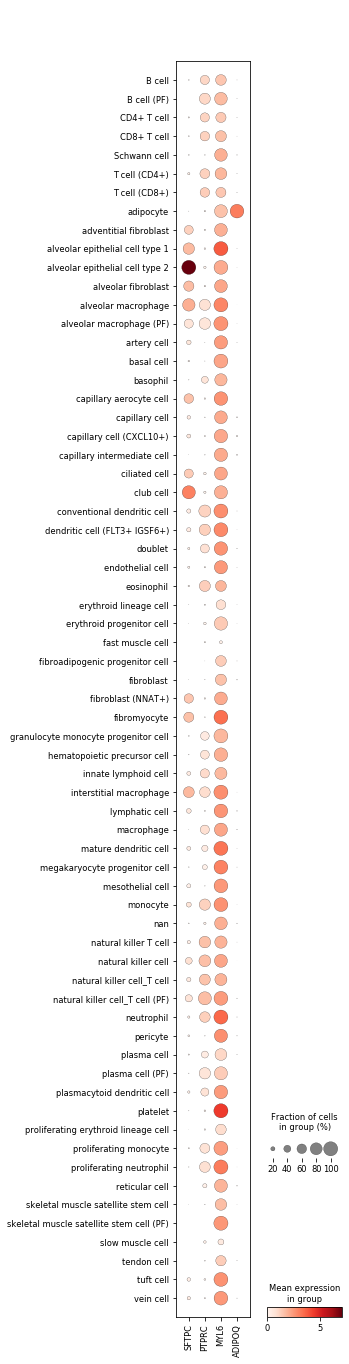

In [127]:
scanpy.pl.dotplot(lemur_one2one, var_names=['SFTPC', 'PTPRC', 'MYL6', 'ADIPOQ'], groupby='narrow_group')

In [128]:
lemur_one2one.var.head()

,name,highly_variable
RBP2,RBP2,False
COPB2,COPB2,True
MRPS22,MRPS22,False
FOXL2,FOXL2,False
PIK3CB,PIK3CB,False


### Use human gene names

In [129]:
lemur_one2one_new_var = lemur_one2one.var.merge(gene_orthologies_one2one_all_three, left_index=True, right_on='mouse_lemur__gene_name')
print(lemur_one2one_new_var.shape)
lemur_one2one_new_var.head()

(15102, 5)


,name,highly_variable,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
9857,RBP2,False,RBP2,RBP2,Rbp2
7929,COPB2,True,COPB2,COPB2,Copb2
12957,MRPS22,False,MRPS22,MRPS22,Mrps22
196,FOXL2,False,FOXL2,FOXL2,Foxl2
14030,PIK3CB,False,PIK3CB,PIK3CB,Pik3cb


In [130]:
lemur_one2one.var = lemur_one2one_new_var.set_index('human__gene_name')
lemur_one2one.var.head()

,name,highly_variable,mouse_lemur__gene_name,mouse__gene_name
human__gene_name,,,,
RBP2,RBP2,False,RBP2,Rbp2
COPB2,COPB2,True,COPB2,Copb2
MRPS22,MRPS22,False,MRPS22,Mrps22
FOXL2,FOXL2,False,FOXL2,Foxl2
PIK3CB,PIK3CB,False,PIK3CB,Pik3cb


## Write whole object to file

In [132]:
for d in outdirs:
    h5ad = f"{d}/alltissues__10x__lemur__one2one_orthologs__july2021.h5ad"
    %time lemur_one2one.write(h5ad)


CPU times: user 1.91 s, sys: 3.91 s, total: 5.83 s
Wall time: 4min 6s
CPU times: user 982 ms, sys: 1.85 s, total: 2.83 s
Wall time: 4.43 s


# Human lung Cell atlas data

## Read preprocessed Human h5ad

In [49]:
human_folder = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/human-lung-cell-atlas--from-kyle'
! ls -lha $human_folder

total 8.5G
drwxr-xr-x 2 olga czb 4.0K Feb 15 10:35 .
drwxrwxr-x 8 olga czb 4.0K Feb 15 10:35 ..
-rw-r--r-- 1 olga czb 8.5G Feb 15 10:35 droplet_normal_lung_blood_P1-3__no_duplicate_barcodes__minimal_obs.h5ad


In [ ]:
%%time

h5ad = f"{human_folder}/droplet_normal_lung_blood_P1-3__no_duplicate_barcodes__minimal_obs.h5ad"
human = scanpy.read(h5ad, cache=True)
human

## Subset to 1:1 orthologs

In [ ]:
gene_mask = human.var.index.isin(gene_orthologies_one2one_all_three['human__gene_name'].values)
print(gene_mask.sum())

# Need to copy so it's not an ArrayView object
human_one2one = human[:, gene_mask].copy()
human_one2one

In [ ]:
human_one2one.var = gene_orthologies_one2one_all_three.set_index('human__gene_name').loc[human_one2one.var.index]
human_one2one.var.head()

### Check on "LOC" genes in mouse lemur

In [ ]:
gene_orthologies_one2one_all_three.loc[gene_orthologies_one2one_all_three.mouse_lemur__gene_name.str.startswith("LOC")]

## Write human to file

In [ ]:
for d in outdirs:

    h5ad = f"{d}/hlca_lung_blood_10x__human__one2one_orthologs.h5ad"
    human_one2one.write(h5ad)

#     human_one2one.write_csvs(f'{d}/hlca_lung_blood__10x__human__one2one_orthologs__csvs/')


In [ ]:
! ls -lha $h5ad

# Human: Tabula Sapiens

In [ ]:
h5ad = os.path.join('/home/olga/data_lg/data_sm_copy/tabula-sapiens/data-objects/Pilot1_Pilot2_decontX_Oct2020__minimal_no_pilot2_diaphragm__muscle_update_june2021.h5ad')
sapiens = scanpy.read(h5ad, cache=True)
sapiens

In [ ]:
def check_celltype_presence(adata, celltypes=('slow muscle cell', 'fast muscle cell'), celltype_col='narrow_group'):
    for celltype in celltypes:
        assert celltype in set(adata.obs[celltype_col])
        
check_celltype_presence(sapiens)

## Subset to 1:1 orthologs

In [ ]:
gene_mask = sapiens.var.index.isin(gene_orthologies_one2one_all_three['human__gene_name'].values)
print(gene_mask.sum())

# Need to copy so it's not an ArrayView object
sapiens_one2one = sapiens[:, gene_mask].copy()
sapiens_one2one

In [ ]:
sapiens_one2one.var = gene_orthologies_one2one_all_three.set_index('human__gene_name').loc[sapiens_one2one.var.index]
sapiens_one2one.var.head()

## Write sapiens subset to file

In [ ]:
sapiens_h5ad = os.path.join(outdir_local, 'tabula_sapiens__10x__human__one2one_orthologs__june2021_muscle_update.h5ad')
sapiens.write(sapiens_h5ad)

In [ ]:
! ls -lha $sapiens_h5ad